### Assumption 1 - Individual Scatter Plots

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = 7 * np.random.rand(100,1) - 2.8
y = 7 * np.random.rand(100,1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*y*x + np.random.randn(100,1)


df = pd.DataFrame()

df['x1'] = x.reshape(100)
df['x2'] = y.reshape(100)
df['y'] = z.reshape(100)

df

,x1,x2,y
0,-1.614324,0.678784,1.394011
1,0.946416,-2.050305,4.881831
2,-0.558044,-0.274788,1.265000
3,2.913967,-0.544151,7.899867
4,-1.620750,3.283980,9.491348
...,...,...,...
95,1.334901,1.859627,6.946164
96,3.309907,-0.541636,11.593428
97,2.723326,3.369902,19.548740
98,-2.390119,3.091159,13.422299


Text(0, 0.5, 'y')

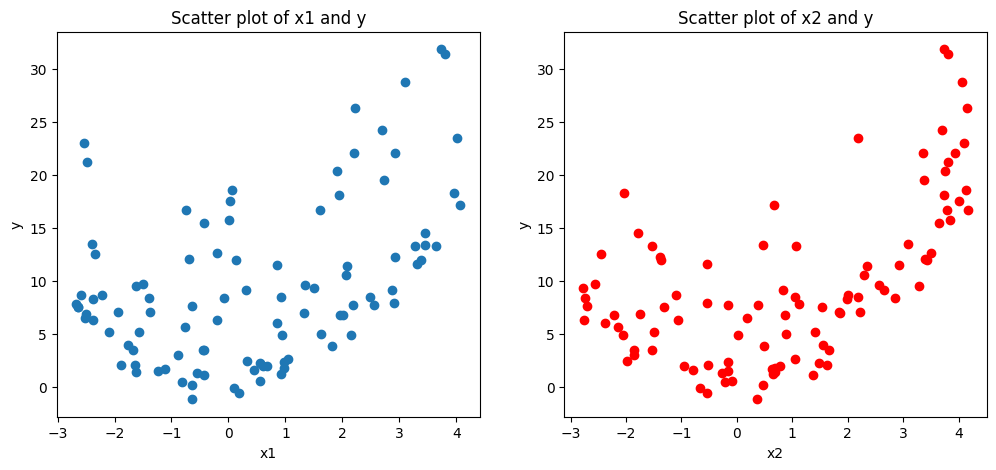

In [16]:
# Create a new figure and define the subplots
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (12,5))

#plot the x1 and y
ax1.scatter(df['x1'],df['y'])
ax1.set_title('Scatter plot of x1 and y')
ax1.set_xlabel('x1')
ax1.set_ylabel('y')


#plot the x2 and y
ax2.scatter(df['x2'],df['y'], color = "red")
ax2.set_title('Scatter plot of x2 and y')
ax2.set_xlabel('x2')
ax2.set_ylabel('y')

 plotting both the individual input columns and analyzing them

### Assumption 1 :  Residual plot

Text(0, 0.5, 'Residuals')

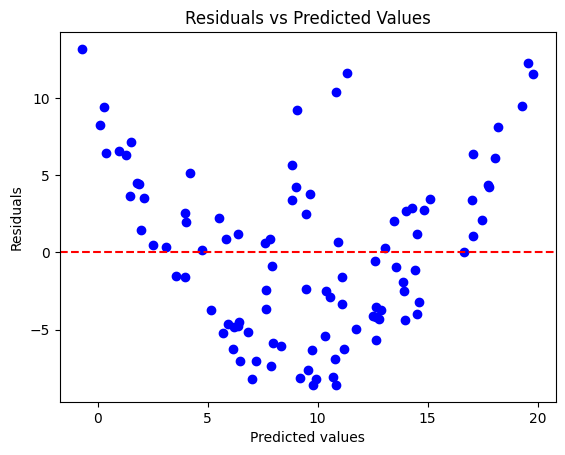

In [20]:
# fit a linear regression model
X = df[['x1','x2']]
y = df['y']

model  = LinearRegression()
model.fit(X,y)

# Calculate predicted values and residuals
y_pred = model.predict(X)
residuals = y - y_pred

# plot the model against predicted values
plt.scatter(y_pred,residuals, color = 'blue')
plt.axhline( y = 0, color = 'red', linestyle = '--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')

We can see that the graph is not random and some parabola like structure is starting to form.
And since it is not random, now you can conclude that here exists non linearity.

#### Assumption 1 : Polynomial Regression

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split


# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)


# Fit a linear regression model 
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)
linear_y_pred = linear_model.predict(X_test)


# Calculate metrics for linear model
linear_r2 = r2_score(y_test,linear_y_pred)
linear_mse = mean_squared_error(y_test,linear_y_pred)

# Fit a polynomial model
poly_features = PolynomialFeatures(degree = 2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)


poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
poly_y_pred = poly_model.predict(X_test_poly)

# Calculate metrics for polynomial model
poly_r2 = r2_score(y_test, poly_y_pred)
poly_mse = mean_squared_error(y_test, poly_y_pred)

# Compare the model performance
print('Linear Model : ')
print(f'R2 score of Linear model is {linear_r2}')
print(f'MSE of Linear model is {linear_mse}')

print('polynomial  Model : ')
print(f'R2 score of poly model is {poly_r2}')
print(f'MSE of poly model is {poly_mse}')

Linear Model : 
R2 score of Linear model is 0.278589771101975
MSE of Linear model is 26.66475917836312
polynomial  Model : 
R2 score of poly model is 0.9424194918009549
MSE of poly model is 2.1282902889256556


Significant increase in r2_Score and a decrease in MSE shows that, there exists non linearity in the modeL

### What do we do when the assumptions fails ? 

#### 1. Apply Transformations

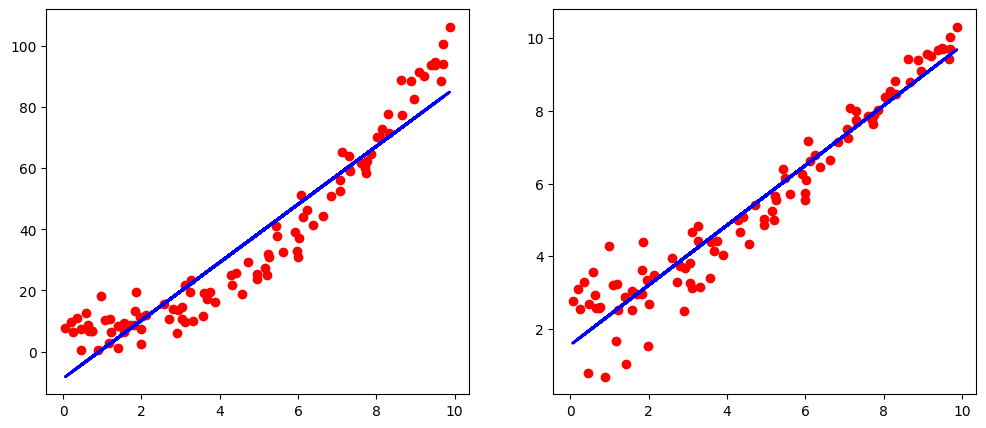

Original Linear Model : 
0.9007887768060907
Transformed Linear Model : 
0.9290590339678223


In [44]:
 nsformed.fit(x,y_sqrt)


# Predictions
y_pred_original = linear_model_original.predict(x)
y_pred_transformed = linear_model_transformed.predict(x)

# before transformation
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (12,5))

ax1.scatter(x,y,color = "red")
ax1.plot(x,y_pred_original, color = "blue",linewidth=2)

ax2.scatter(x,y_sqrt, color  = "red")
ax2.plot(x,y_pred_transformed,color = "blue",linewidth=2)

plt.show()

print("Original Linear Model : ")
print(r2_score(y,y_pred_original))

print("Transformed Linear Model : ")
print(r2_score(y_sqrt,y_pred_transformed))

In first diagram we can see that there is slighly non lineariy but in second after using x and y_sqrt to train the model, after the transformation : 
1. the data transformed
2. better fit of regression line
3. r2_score increase by 2 percent

#### 2.Polynomial Regression
above mention code `Assumption 1 : Polynomial Regression`

### Assumption 2 : Normality of residuals 
error -> (y-y^) follow normal distribution and mean = 0

#### How to check this assumption : 
1. Histogram of residuals

<Axes: ylabel='Count'>

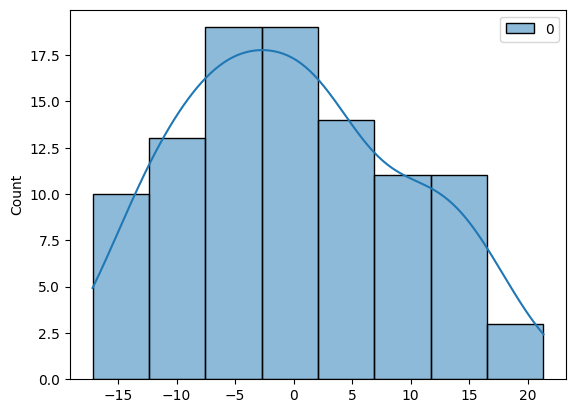

In [52]:
residual = y-y_pred_original
import seaborn as sns
sns.histplot(residual,kde = True)

2. Q-Q plot

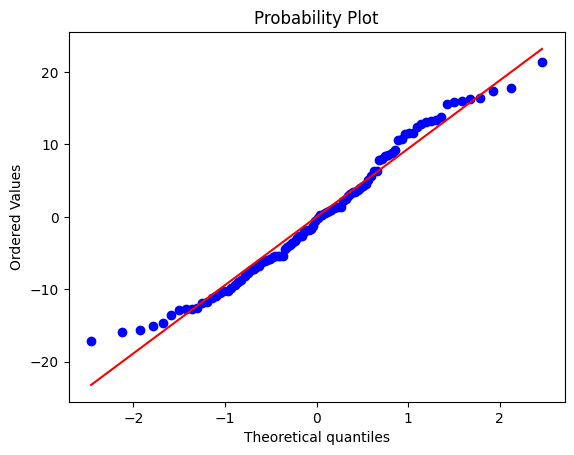

In [54]:
from scipy import stats
stats.probplot(residual.flatten(), plot= plt)
plt.show()

In [65]:
### mean check
mean_residual = np.mean(residual)
print(f'{mean_residual:.4f}')

-0.0000


3. Residual Graph
Since cannot se a clear patter in the graph -> can say that residuals follow normal distribution

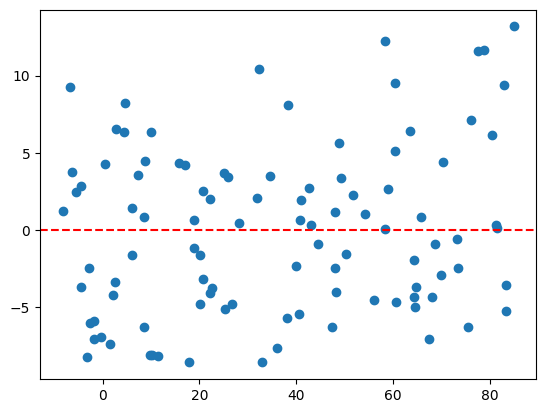

In [67]:
plt.scatter(y_pred_original,resudials)
plt.axhline(y=0,color="r",linestyle = '--')

Also in the model summary above -> also seen in Regression Analysis notebook.
Omnibus test and Jarque-bera test -> they too test for normality

Omnibus test explanation present in Notes

In [77]:
import pandas as pd
import statsmodels.api as sm # help to perform linear regression -> but gives a detailed analysis

url = "https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv"
data = pd.read_csv(url, index_col = 0)

X = data[['TV','Radio','Newspaper']]
y = data['Sales']

X = sm.add_constant(X) # adding a constant for the intercept

# Fit the model using the independent and the dependent variables
model = sm.OLS(y,X).fit()

y_pred = model.predict(X)
residual = y -y_pred
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 07 Apr 2024   Prob (F-statistic):           1.58e-96
Time:                        01:14:06   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

In [78]:
omnibus_stats, omnibus_p_value = stats.normaltest(residual)
omnibus_stats, omnibus_p_value
# here omnibus p-value >> than significance (0.05) therefore we can conclude that
# the residuals are normally distributed. (accepting the null hypothesis)

(60.4139594552554, 7.608085583222186e-14)